# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales (CNN)
- Redes neuronales recurrentes (RNN)

In [ ]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [ ]:
path_colab_notebooks = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/'

## Neural Architecture Search Network (NASNet)

Ésta red neuronal fue introducida a comienzos del año 2018 por el equipo de Google Brain. El paper donde presentaron la arquitectura es el siguiente (mas de 500 citas):

- Barret Zoph, Vijay Vasudevan, Jonathon Shlens, Quoc V. Le (2018). Learning Transferable Architectures for Scalable Image Recognition.  The IEEE Conference on Computer Vision and Pattern Recognition (CVPR 2018), pp. 8697-8710

Los autores proponen buscar un bloque de construcción arquitectónica en un pequeño conjunto de datos y luego transferir el bloque a un conjunto de datos más grande. En particular, primero buscan la mejor capa o celda convolucional en CIFAR-10 y luego la aplican a la ImageNet apilando más copias de esta celda.

### Modelo y especificaciones

La arquitectura NASNet se compone de dos tipos de capas: La capa Normal (izquierda), y la capa de Reducción (derecha). Ambas capas fueron diseñadas por AutoML (conjunto de productos de aprendizaje automático de Google). 

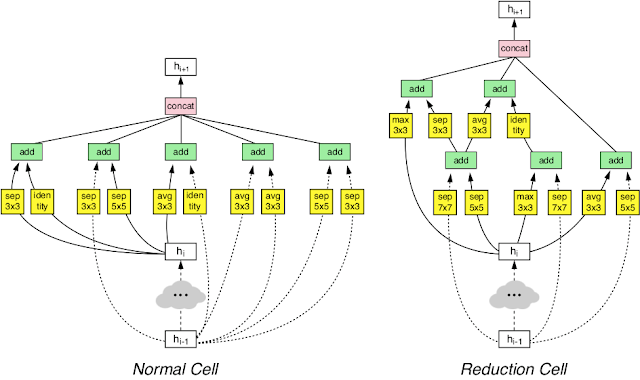

In [ ]:
from IPython.display import Image
Image(filename=valid_path + 'din_fig30.png')

Realizaremos el mismo experimento que en las partes anteriores.

### Importando las librerías necesarias

In [ ]:
import numpy as np
from scipy import misc  
from PIL import Image  
import glob  
import matplotlib.pyplot as plt  
import scipy.misc  
from matplotlib.pyplot import imshow  
%matplotlib inline
from IPython.display import SVG  
import cv2  
import seaborn as sn  
import pandas as pd  
import pickle  
from keras import layers  
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout  
from keras.models import Sequential, Model, load_model  
from keras.preprocessing import image  
from keras.preprocessing.image import load_img  
from keras.preprocessing.image import img_to_array  
from keras.applications.imagenet_utils import decode_predictions  
from keras.utils import layer_utils, np_utils  
from keras.utils.data_utils import get_file  
from keras.applications.imagenet_utils import preprocess_input  
from keras.utils.vis_utils import model_to_dot  
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform  
from keras import losses  
import keras.backend as K  
from keras.callbacks import ModelCheckpoint  
from sklearn.metrics import confusion_matrix, classification_report  
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Preparando el conjunto de datos

Como antes, usaremos el conjunto de datos CIFAR-100, que, como ya dijimos, consta de 600 imágenes por cada clase de un total de 100 clases. Se divide en 500 imágenes para entrenamiento y 100 imágenes para validación por cada clase. Las 100 clases están agrupadas en 20 superclases. Cada imagen tiene una etiqueta *fina* (la clase, de entre las 100, a la que pertenece) y una etiqueta *gruesa* (correspondiente a su superclase):

In [ ]:
from keras.datasets import cifar100

(x_train_original, y_train_original), (x_test_original, y_test_original) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 3s 0us/step


Como antes hasta este punto hemos descargado los datasets de entrenamiento y validación. *x_train_original* y *x_test_original* son los conjuntos de datos con lás imágenes de entrenamiento y validación respectivamente, mientras que *y_train_original* y *y_test_original* son los datasets con las etiquetas.

Veíamos que la forma de *y_train_original* era la siguiente:

In [ ]:
y_train_original.shape

(50000, 1)

In [ ]:
y_train_original

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

Así que, inicialmente, había que convertirlo en su versión **one-hot-encoding**:

In [ ]:
y_train = np_utils.to_categorical(y_train_original, 100)
y_test = np_utils.to_categorical(y_test_original, 100)

In [ ]:
y_train.shape

(50000, 100)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

El siguiente paso era ver los datos de entrenamiento (x_train_original):

In [ ]:
x_train_original.shape

(50000, 32, 32, 3)

In [ ]:
x_train_original[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

Representa la imagen en los 3 canales RGB de 256 píxeles. Nuevamente vamos a ver una, la última por ejemplo:

In [ ]:
imgplot = plt.imshow(x_train_original[49999])
plt.show()

### Preparando el entorno

Especificábamos la situación de los canales de las imágenes y la fase del experimento. Nuevamente especificar a Keras dónde se encuentran los canales. En un array de imagenes, pueden venir como último indice o como el primero. Esto se conoce como canales primero (*channels firs*t) o canales al final (*channels last*). En nuestro caso, vamos a definirlos al final. El parámetro *image_data_format* afecta la forma en que cada uno de los frameworks trata las dimensiones de los datos. Específicamente, define dónde está la dimensión de los canales en los datos de entrada. Para Tensorflow o CNTK debe ser *channels_last*, para Theano debería ser *channels_first*.

In [ ]:
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

### Arquitectura de la red: Red neuronal convolucional NASNet

Keras tiene implementada esta arquitectura y además, para arquitecturas pequeñas, tiene la versión Mobile que es la que vamos a utilizar.

In [ ]:
from keras.applications import nasnet

def create_nasnet():  
  model = nasnet.NASNetMobile(input_shape=(32,32,3), include_top=True, weights=None, input_tensor=None, pooling=None, classes=100)

  return model

Lo que hacíamos a continuación, era normalizar las imágenes dividiéndo cada elemento por el numero de píxeles, es decir, 255. Con lo que obteníamos el array con valores de entre 0 y 1:

In [ ]:
x_train = x_train_original/255.0
x_test = x_test_original/255.0

Con esto, tenemos las imágenes a 32X32 píxeles normalizadas en *x_train* y *x_test*.

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.76470588, 0.80392157, 0.75686275],
        [0.83137255, 0.87843137, 0.8       ],
        [0.71372549, 0.76078431, 0.65490196]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.66666667, 0.69019608, 0.58823529],
        [0.63137255, 0.65882353, 0.50980392],
        [0.57254902, 0.60392157, 0.44313725]],

       [[1.        , 1.        , 1.        ],
        [0.99607843, 0.99607843, 0.99607843],
        [1.        , 1.        , 1.        ],
        ...,
        [0.74117647, 0.78039216, 0.6627451 ],
        [0.65098039, 0.69803922, 0.50980392],
        [0.4745098 , 0.52156863, 0.34117647]],

       ...,

       [[0.58039216, 0.7254902 , 0.30980392],
        [0.55686275, 0.71372549, 0.22352941],
        [0.54901961, 0

### Preparando el entorno

In [ ]:
nasnet_model = create_nasnet()  
nasnet_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc', 'mse'])

Una vez hecho esto, vamos a ver un resumen del modelo creado.

In [ ]:
nasnet_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 15, 15, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 15, 15, 32)   128         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation (Activation)         (None, 15, 15, 32)   0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

Igual que con la arquitectura DenseNet, a pesar de la complejidad de la red tenemos casi 4 millones y medio de parámetros.

Bien, dicho esto, pasamos a entrenar el modelo.

In [ ]:
nasnet = nasnet_model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 106s 68ms/step - loss: 4.1597 - acc: 0.0694 - mse: 0.0098 - val_loss: 4.6347 - val_acc: 0.0124 - val_mse: 0.0099
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 3.7444 - acc: 0.1240 - mse: 0.0095 - val_loss: 4.7518 - val_acc: 0.0149 - val_mse: 0.0099
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 3.5229 - acc: 0.1567 - mse: 0.0093 - val_loss: 4.8595 - val_acc: 0.0112 - val_mse: 0.0099
Epoch 4/10
1563/1563 [==============================] - 103s 66ms/step - loss: 3.3472 - acc: 0.1894 - mse: 0.0091 - val_loss: 4.9752 - val_acc: 0.0100 - val_mse: 0.0100
Epoch 5/10
1563/1563 [==============================] - 105s 67ms/step - loss: 3.1821 - acc: 0.2182 - mse: 0.0089 - val_loss: 5.0641 - val_acc: 0.0101 - val_mse: 0.0100
Epoch 6/10
1563/1563 [==============================] - 104s 67ms/step - loss: 3.0450 - acc: 0.2425 - mse: 0.0087 - val_loss: 5.0645 - val_acc: 0.0101 - va

Veamos las métricas obtenidas para el entrenamiento y validación gráficamente:

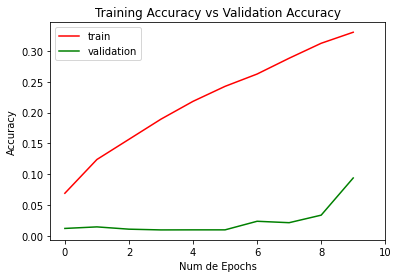

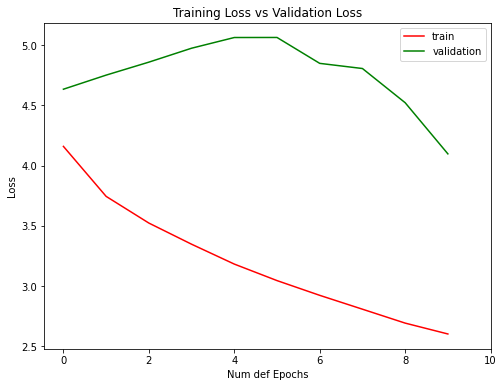

In [ ]:
plt.figure(0)  
plt.plot(nasnet.history['acc'],'r')  
plt.plot(nasnet.history['val_acc'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num de Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(nasnet.history['loss'],'r')  
plt.plot(nasnet.history['val_loss'],'g')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num def Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

plt.show()

El entrenamiento ha dado muy buenos resultados y ha generalizado decentemente. Los resultados a priori parecen tan buenos como los de la DenseNet.

### Matriz de confusión

Pasemos ahora a ver la matriz de confusión y las métricas de *Accuracy*, *Recall* y *F1-score*.

Vamos a hacer una predicción sobre el dataset de validación y, a partir de ésta, generamos la matriz de confusión y mostramos las métricas mencionadas anteriormente:

In [ ]:
nasnet_pred = nasnet_model.predict(x_test, batch_size=32, verbose=1)  
nasnet_predicted = np.argmax(nasnet_pred, axis=1)

nasnet_cm = confusion_matrix(np.argmax(y_test, axis=1), nasnet_predicted)

# Visualizing of confusion matrix
nasnet_df_cm = pd.DataFrame(nasnet_cm, range(100), range(100))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(nasnet_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()

313/313 [==============================] - 5s 16ms/step


Y por último, mostramos las métricas:

In [ ]:
nasnet_report = classification_report(np.argmax(y_test, axis=1), nasnet_predicted)  
print(nasnet_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.10      0.23      0.14       100
           4       0.23      0.03      0.05       100
           5       0.50      0.02      0.04       100
           6       0.05      0.38      0.08       100
           7       1.00      0.01      0.02       100
           8       0.27      0.12      0.17       100
           9       0.35      0.13      0.19       100
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00       100
          12       0.00      0.00      0.00       100
          13       0.10      0.17      0.13       100
          14       0.07      0.06      0.06       100
          15       0.00      0.00      0.00       100
          16       0.42      0.14      0.21       100
          17       0.16    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Curva ROC (tasas de verdaderos positivos y falsos positivos)

Vamos a codificar la curva ROC para clasificación multiclase.

In [ ]:
from sklearn.datasets import make_classification  
from sklearn.preprocessing import label_binarize  
from scipy import interp  
from itertools import cycle

n_classes = 100

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()  
tpr = dict()  
roc_auc = dict()  
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], nasnet_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), nasnet_pred.ravel())  
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)  
for i in range(n_classes):  
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr  
tpr["macro"] = mean_tpr  
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(n_classes-97), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()


# Zoom in view of the upper left corner.
plt.figure(2)  
plt.xlim(0, 0.2)  
plt.ylim(0.8, 1)  
plt.plot(fpr["micro"], tpr["micro"],  
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],  
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])  
for i, color in zip(range(3), colors):  
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('Some extension of Receiver operating characteristic to multi-class')  
plt.legend(loc="lower right")  
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


Vamos a ver algunos resultados:

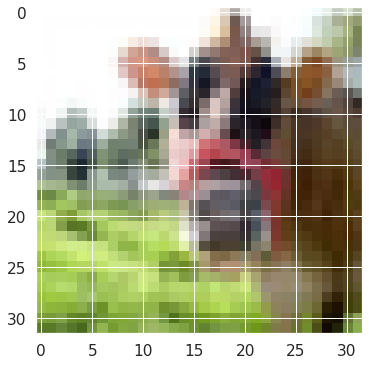

class for image: 49
predicted:         72


In [ ]:
imgplot = plt.imshow(x_train_original[0])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[0])))  
print('predicted:         ' + str(nasnet_predicted[0]))

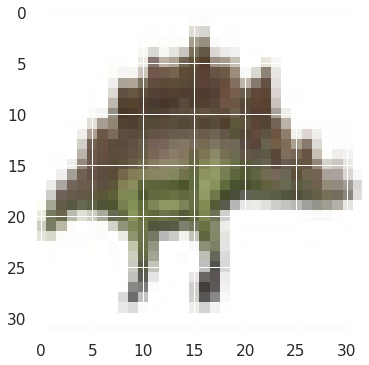

class for image: 33
predicted:         80


In [ ]:
imgplot = plt.imshow(x_train_original[1])
plt.show()  
print('class for image: ' + str(np.argmax(y_test[1])))  
print('predicted:         ' + str(nasnet_predicted[1]))

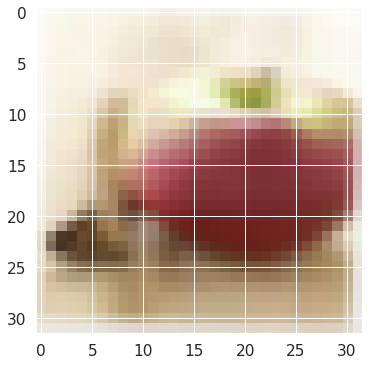

class for image: 72
predicted:         56


In [ ]:
imgplot = plt.imshow(x_train_original[2])
plt.show()  
print('class for image: ' + str(np.argmax(y_test[2])))  
print('predicted:         ' + str(nasnet_predicted[2]))

In [ ]:
imgplot = plt.imshow(x_train_original[3])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[3])))  
print('predicted:         ' + str(nasnet_predicted[3]))

class for image: 51
predicted:         37


In [ ]:
imgplot = plt.imshow(x_train_original[4])  
plt.show()  
print('class for image: ' + str(np.argmax(y_test[4])))  
print('predicted:         ' + str(nasnet_predicted[4]))

class for image: 71
predicted:         31


Salvaremos los datos del histórico de entrenamiento para compararlos con otros modelos y, además, vamos a salvar el modelo con los pesos entrenados para usarlos en el futuro.

In [ ]:
# Modelo
nasnet_model.save(valid_path + 'nasnet.h5')

# Histórico
with open(valid_path + 'nasnet_history.txt', 'wb') as file_pi:  
  pickle.dump(nasnet.history, file_pi)

A continuación, vamos a comparar las métricas con los modelos anteriores:

In [ ]:
plt.figure(0)  
plt.plot(snn_history['val_acc'],'r')  
#plt.plot(scnn_history['val_acc'],'g')  
#plt.plot(vgg16_history['val_acc'],'b')  
#plt.plot(cvgg16_history['val_acc'],'y')  
plt.plot(crn50_history['val_acc'],'gold')  
plt.plot(cdense_history['val_acc'],'m')  
plt.plot(nasnet_history['val_acc'],'c')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Models")  
plt.legend(['simple NN','CNN','VGG 16','Custom VGG','Custom ResNet', 'Custom DenseNet', 'Mobile NasNET'])

In [ ]:
plt.figure(1)  
plt.plot(snn_history['val_loss'],'r')  
plt.plot(scnn_history['val_loss'],'g')  
plt.plot(vgg16_history['val_loss'],'b')  
plt.plot(cvgg16_history['val_loss'],'y')  
plt.plot(crn50_history['val_loss'],'gold')  
plt.plot(cdense_history['val_loss'],'m')  
plt.plot(nasnet_history['val_loss'],'c')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Models")  
plt.legend(['simple NN','CNN','VGG 16','Custom VGG','Custom ResNet', 'Custom DenseNet', 'Mobile NasNET'])

In [ ]:
plt.figure(2)  
plt.plot(snn_history['val_mean_squared_error'],'r')  
plt.plot(scnn_history['val_mean_squared_error'],'g')  
plt.plot(vgg16_history['val_mean_squared_error'],'b')  
plt.plot(cvgg16_history['val_mean_squared_error'],'y')  
plt.plot(crn50_history['val_mean_squared_error'],'gold')  
plt.plot(cdense_history['val_mean_squared_error'],'m')  
plt.plot(nasnet_history['val_mean_squared_error'],'c')  
plt.xticks(np.arange(0, 11, 2.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Mean Squared Error")  
plt.title("Models")  
plt.legend(['simple NN','CNN','VGG 16','Custom VGG','Custom ResNet', 'Custom DenseNet', 'Mobile NasNET'])

### Conclusión

La arquitectura NASNet da unos resultados tan buenos como la anterior DenseNet reduciendo además el número de parámetros a aprender.